In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

In [56]:
with open('CF_2000_2017.txt', 'r') as f:
    CF = np.array(f.read().splitlines(), dtype=float)[:157789]
with open('price_2000_2017.txt', 'r') as f:
    Price = np.array(f.read().splitlines(), dtype=float)

Price     = np.flip(Price)

In [57]:
start_date = '2000-01-01 00:00:00'
end_date   = '2017-12-31 12:00:00'
time_index = pd.date_range(start=start_date, end=end_date, freq='H')

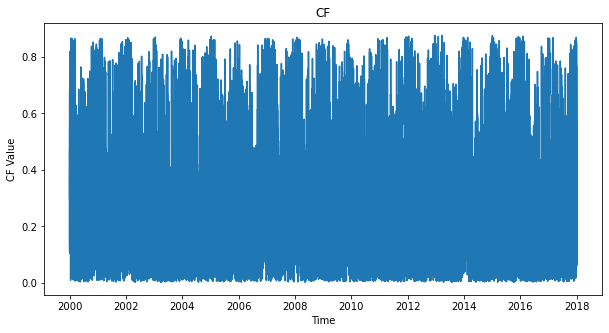

In [58]:
# Plot CF 
plt.figure(figsize=(10, 5))
plt.plot(time_index, CF)
plt.title('CF')
plt.xlabel('Time')
plt.ylabel('CF Value')
plt.show()

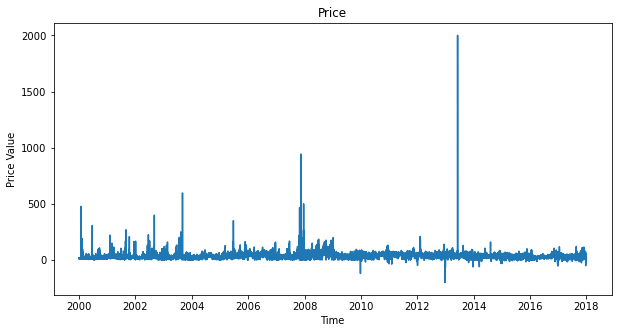

In [59]:
# Plot Price
plt.figure(figsize=(10, 5))
plt.plot(time_index, Price)
plt.title('Price')
plt.xlabel('Time')
plt.ylabel('Price Value')
plt.show()

In [60]:
# Mean of the Price
np.mean(Price)

34.136774176171976

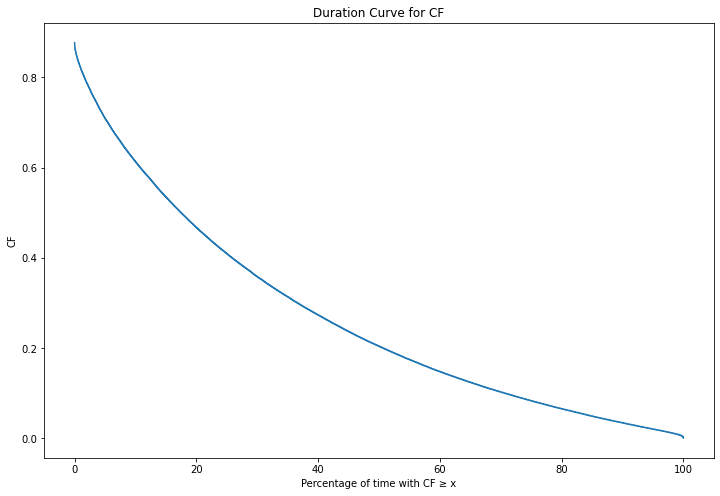

In [61]:
# Duration curve for CF
sorted_CF  = sorted(CF,reverse=False)
percentage = 100 * (1 - np.arange(1, len(sorted_CF) + 1) / (len(sorted_CF) + 1)) 

plt.figure(figsize=(12, 8))
plt.plot(percentage,sorted_CF)
plt.title('Duration Curve for CF')
plt.xlabel('Percentage of time with CF ≥ x')
plt.ylabel('CF')
plt.show()

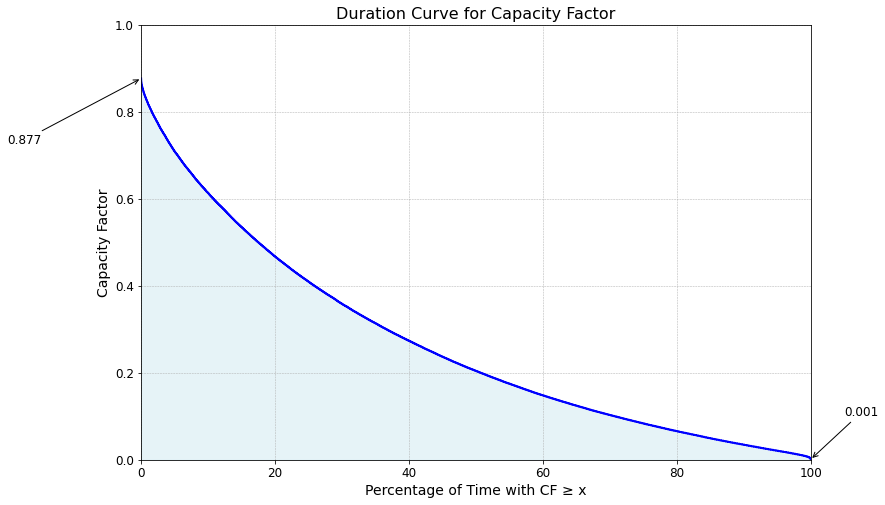

In [62]:
# Duration curve for CF
sorted_CF = sorted(CF, reverse=False)
percentage = 100 * (1 - np.arange(1, len(sorted_CF) + 1) / (len(sorted_CF) + 1)) 

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(percentage, sorted_CF, color='blue', linewidth=2)
plt.title('Duration Curve for Capacity Factor', fontsize=16)
plt.xlabel('Percentage of Time with CF ≥ x', fontsize=14)
plt.ylabel('Capacity Factor', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the appearance
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.fill_between(percentage, sorted_CF, color='lightblue', alpha=0.3)

# Add annotations
plt.annotate(f'{sorted_CF[0]:.3f}', xy=(percentage[0], sorted_CF[0]), xytext=(percentage[0]+5, sorted_CF[0]+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.annotate(f'{sorted_CF[-1]:.3f}', xy=(percentage[-1], sorted_CF[-1]), xytext=(percentage[-1]-20, sorted_CF[-1]-0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.show()

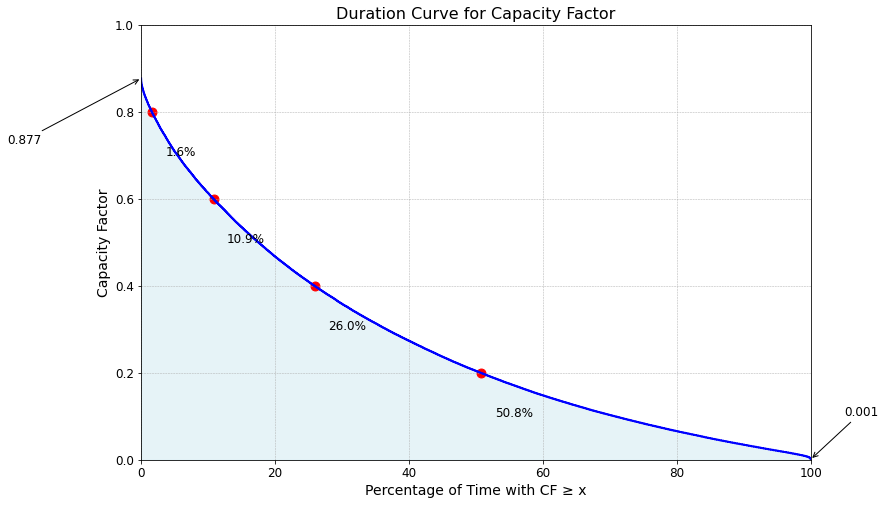

In [63]:
# Duration curve for CF
sorted_CF = sorted(CF, reverse=False)
percentage = 100 * (1 - np.arange(1, len(sorted_CF) + 1) / (len(sorted_CF) + 1)) 

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(percentage, sorted_CF, color='blue', linewidth=2)
plt.title('Duration Curve for Capacity Factor', fontsize=16)
plt.xlabel('Percentage of Time with CF ≥ x', fontsize=14)
plt.ylabel('Capacity Factor', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the appearance
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.fill_between(percentage, sorted_CF, color='lightblue', alpha=0.3)

# Add dots and annotations
# Add annotations
plt.annotate(f'{sorted_CF[0]:.3f}', xy=(percentage[0], sorted_CF[0]), xytext=(percentage[0]+5, sorted_CF[0]+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.annotate(f'{sorted_CF[-1]:.3f}', xy=(percentage[-1], sorted_CF[-1]), xytext=(percentage[-1]-20, sorted_CF[-1]-0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

cf_values = [0.8, 0.6, 0.4, 0.2]
for cf in cf_values:
    index = next(i for i, val in enumerate(sorted_CF) if val >= cf)
    plt.scatter(percentage[index], sorted_CF[index], color='red', s=80)
    plt.annotate(f'{percentage[index]:.1f}%', xy=(percentage[index], sorted_CF[index]), xytext=(percentage[index] + 2, sorted_CF[index] - 0.1), fontsize=12)

plt.show()

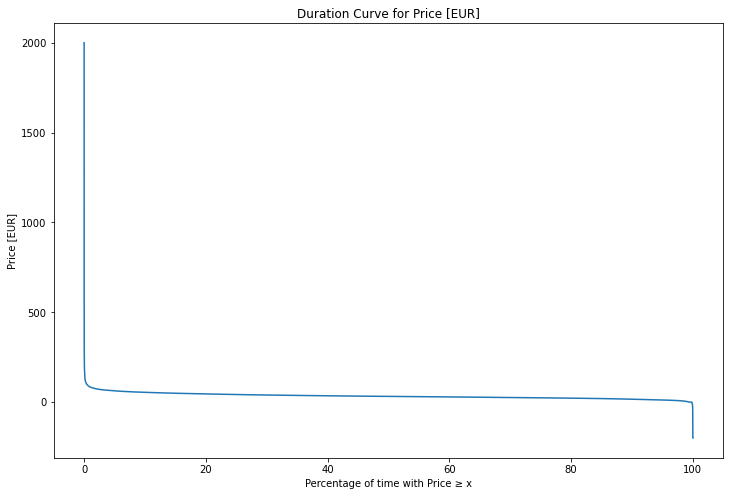

In [64]:
# Duration curve for Price
sorted_price = sorted(Price,reverse=False)
percentage_p = 100 * (1 - np.arange(1, len(sorted_CF) + 1) / (len(sorted_CF) + 1)) 

plt.figure(figsize=(12, 8))
plt.plot(percentage_p,sorted_price)
plt.title('Duration Curve for Price [EUR]')
plt.xlabel('Percentage of time with Price ≥ x')
plt.ylabel('Price [EUR]')
plt.show()

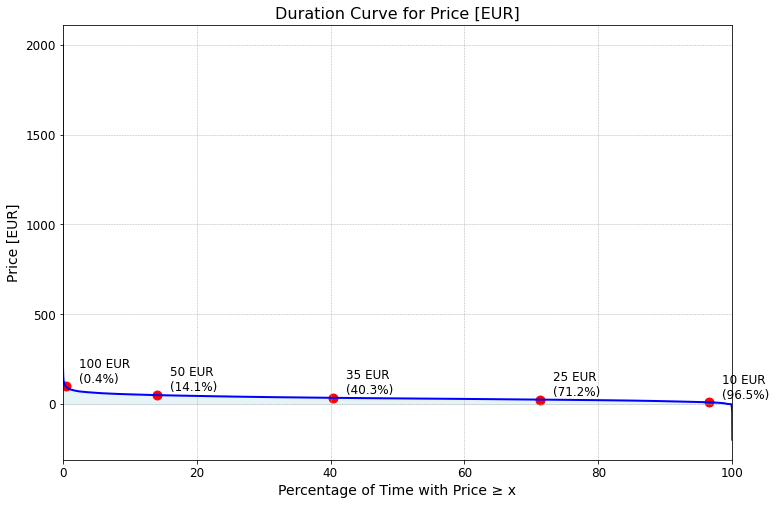

In [65]:
# Duration curve for Price
sorted_price = sorted(Price, reverse=False)
percentage_p = 100 * (1 - np.arange(1, len(sorted_CF) + 1) / (len(sorted_CF) + 1))

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(percentage_p, sorted_price, color='blue', linewidth=2)
plt.title('Duration Curve for Price [EUR]', fontsize=16)
plt.xlabel('Percentage of Time with Price ≥ x', fontsize=14)
plt.ylabel('Price [EUR]', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the appearance
plt.xlim([0, 100])
plt.fill_between(percentage_p, sorted_price, color='lightblue', alpha=0.3)

# Add dots and annotations
price_values = [100, 50, 35, 25, 10]
for price in price_values:
    index = next(i for i, val in enumerate(sorted_price) if val >= price)
    plt.scatter(percentage_p[index], sorted_price[index], color='red', s=80)
    plt.annotate(f'{price} EUR\n({percentage_p[index]:.1f}%)',
                 xy=(percentage_p[index], sorted_price[index]),
                 xytext=(percentage_p[index] + 2, sorted_price[index] + 5),
                 fontsize=12, verticalalignment='bottom')

plt.show()

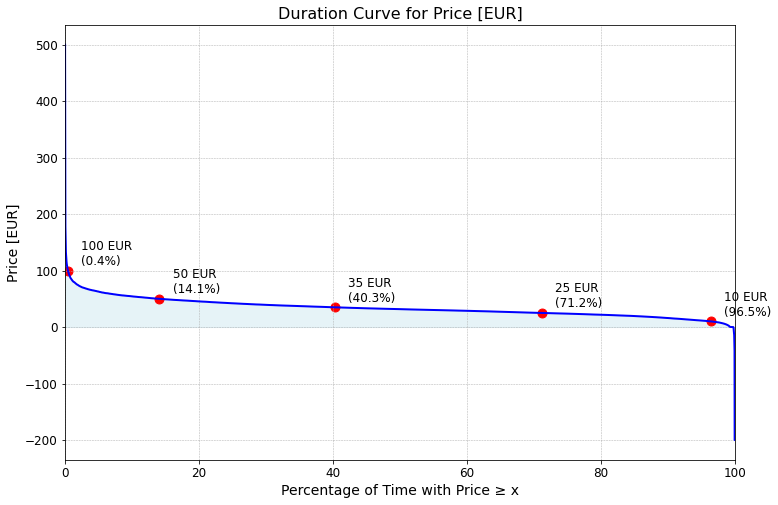

In [66]:
# Filter data for prices lower than or equal to 1000
filtered_price = [p for p in Price if p <= 500]

# Duration curve for Price
sorted_price = sorted(filtered_price, reverse=False)
percentage_p = 100 * (1 - np.arange(1, len(sorted_price) + 1) / (len(sorted_price) + 1))

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(percentage_p, sorted_price, color='blue', linewidth=2)
plt.title('Duration Curve for Price [EUR]', fontsize=16)
plt.xlabel('Percentage of Time with Price ≥ x', fontsize=14)
plt.ylabel('Price [EUR]', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the appearance
plt.xlim([0, 100])
plt.fill_between(percentage_p, sorted_price, color='lightblue', alpha=0.3)

# Add dots and annotations if there are filtered prices
if filtered_price:
    price_values = [100, 50, 35, 25, 10]
    for price in price_values:
        index = next((i for i, val in enumerate(sorted_price) if val >= price), None)
        if index is not None:
            plt.scatter(percentage_p[index], sorted_price[index], color='red', s=80)
            plt.annotate(f'{price} EUR\n({percentage_p[index]:.1f}%)',
                         xy=(percentage_p[index], sorted_price[index]),
                         xytext=(percentage_p[index] + 2, sorted_price[index] + 5),
                         fontsize=12, verticalalignment='bottom')
else:
    plt.text(50, 500, 'No prices below 1000 EUR', fontsize=14, ha='center')

plt.show()

In [67]:
num_below_zero = sum(Price < 0 for Price in Price)
print(f"The number of price values below 0: {num_below_zero}")
print(len(Price))

The number of price values below 0: 364
157789


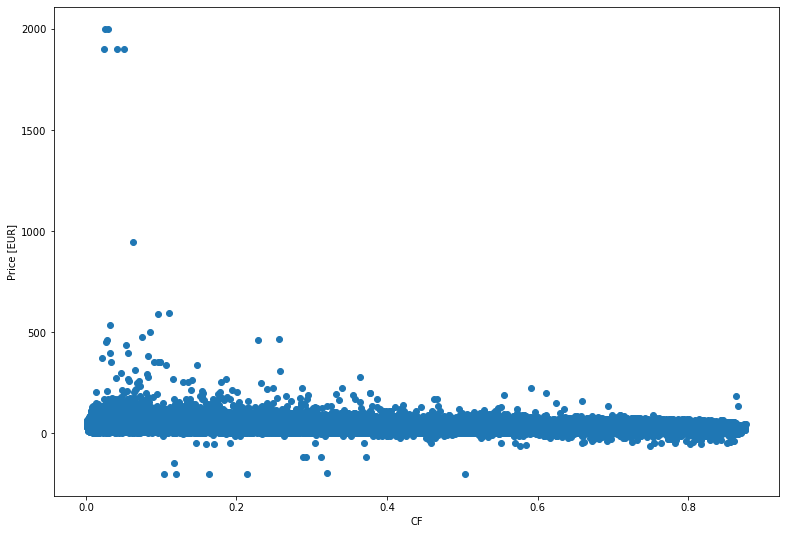

In [68]:
# Plot CF and Price 
plt.figure(figsize=(13, 9))
plt.scatter(CF,Price)
plt.xlabel('CF')
plt.ylabel('Price [EUR]')
plt.show()

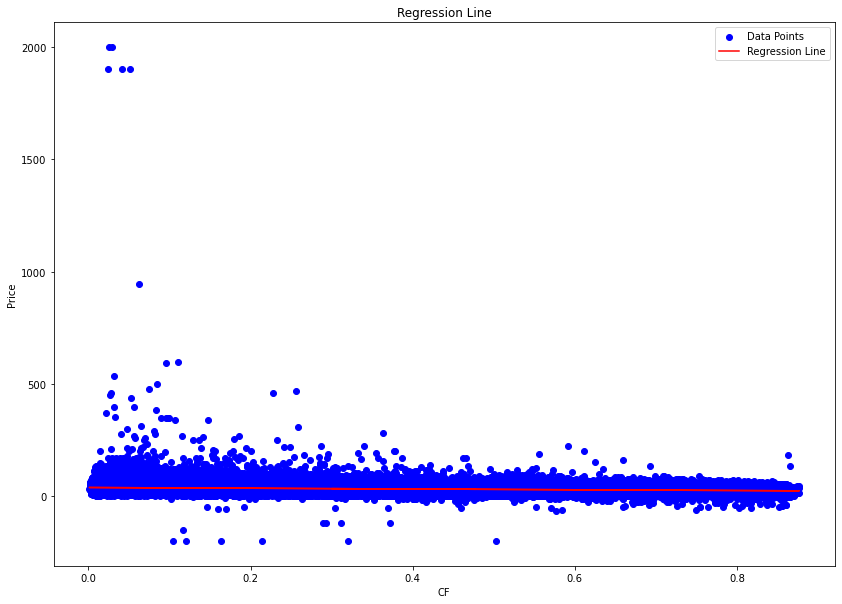

In [69]:
# Simple Regression
CF = CF.reshape(-1, 1)

regression_model = LinearRegression()
regression_model.fit(CF, Price)

# Slope
slope = regression_model.coef_[0]

# Plot
plt.figure(figsize=(14, 10))
plt.scatter(CF, Price, color='b', label='Data Points')
plt.plot(CF, regression_model.predict(CF), color='r', label='Regression Line')
plt.xlabel('CF')
plt.ylabel('Price')
plt.legend()
plt.title('Regression Line')
plt.show()

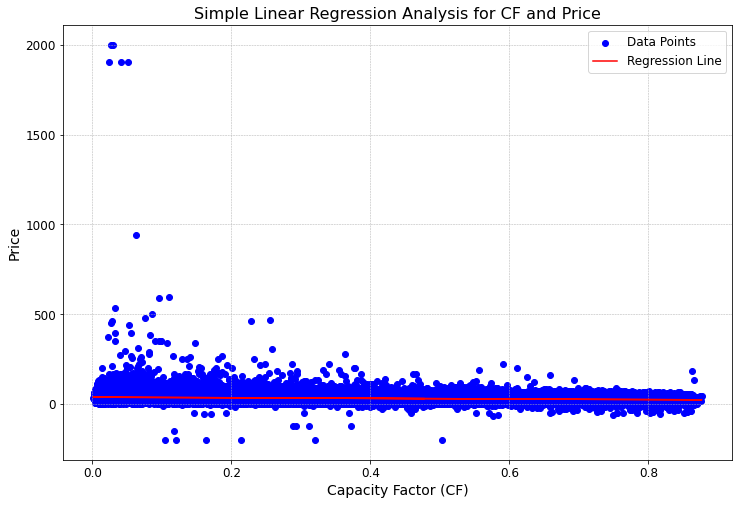

In [70]:
# Create the plot
plt.figure(figsize=(12, 8))

# Plot the data points
plt.scatter(CF, Price, color='b', label='Data Points')

# Plot the regression line
plt.plot(CF, regression_model.predict(CF), color='r', label='Regression Line')

# Customize the plot
plt.xlabel('Capacity Factor (CF)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Simple Linear Regression Analysis for CF and Price', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

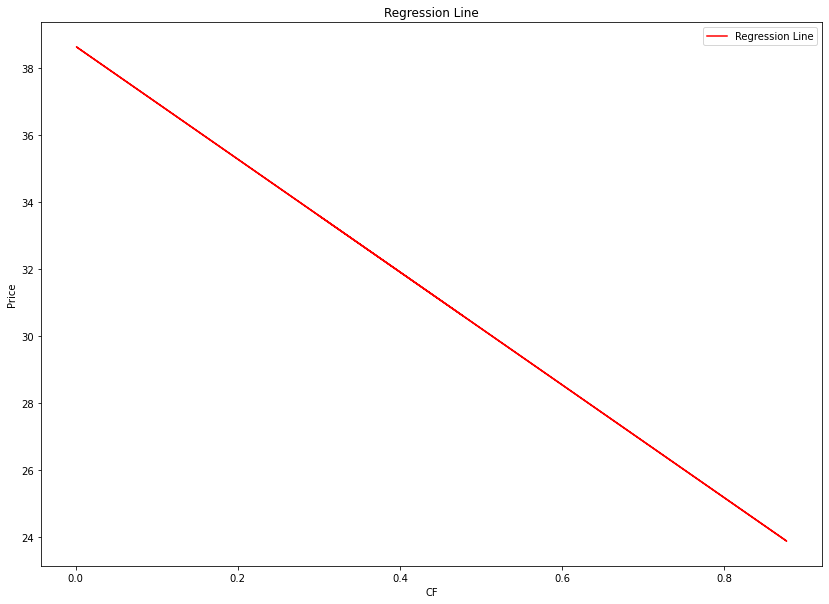

In [71]:
# Generate the regression line points
regression_line = regression_model.predict(CF)

# Plot the regression line
plt.figure(figsize=(14, 10))
plt.plot(CF, regression_line, color='r', label='Regression Line')
plt.xlabel('CF')
plt.ylabel('Price')
plt.legend()
plt.title('Regression Line')
plt.show()

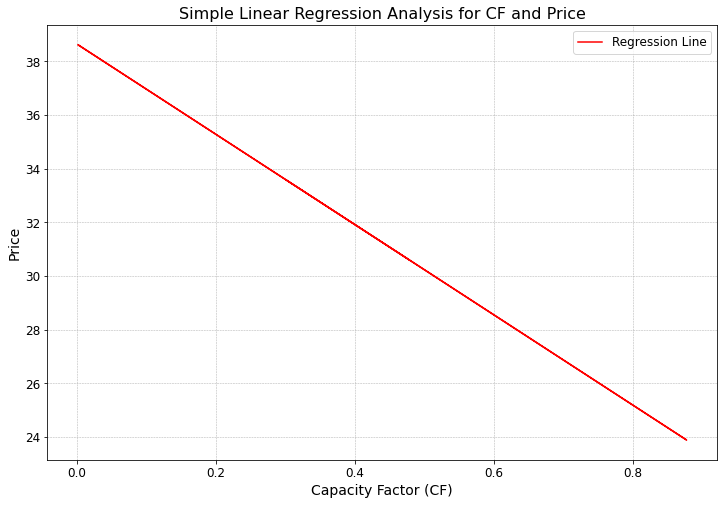

In [72]:
# Generate the regression line points
regression_line = regression_model.predict(CF)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the regression line
plt.plot(CF, regression_line, color='r', label='Regression Line')

# Customize the plot
plt.xlabel('Capacity Factor (CF)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Simple Linear Regression Analysis for CF and Price', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

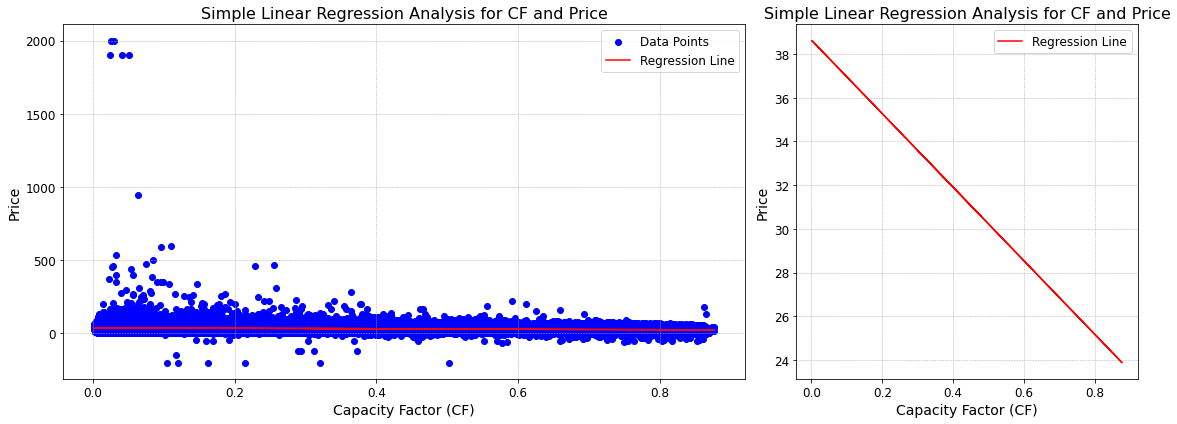

In [73]:
# Create subplots with specified size and width ratios
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Left subplot - Simple Linear Regression Analysis for CF and Price
axs[0].scatter(CF, Price, color='b', label='Data Points')
axs[0].plot(CF, regression_model.predict(CF), color='r', label='Regression Line')
axs[0].set_xlabel('Capacity Factor (CF)', fontsize=14)
axs[0].set_ylabel('Price', fontsize=14)
axs[0].set_title('Simple Linear Regression Analysis for CF and Price', fontsize=16)
axs[0].legend(fontsize=12)
axs[0].grid(True, linestyle='--', linewidth=0.5)
axs[0].tick_params(labelsize=12)

# Right subplot - Regression Line
axs[1].plot(CF, regression_line, color='r', label='Regression Line')
axs[1].set_xlabel('Capacity Factor (CF)', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)
axs[1].set_title('Simple Linear Regression Analysis for CF and Price', fontsize=16)
axs[1].legend(fontsize=12)
axs[1].grid(True, linestyle='--', linewidth=0.5)
axs[1].tick_params(labelsize=12)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

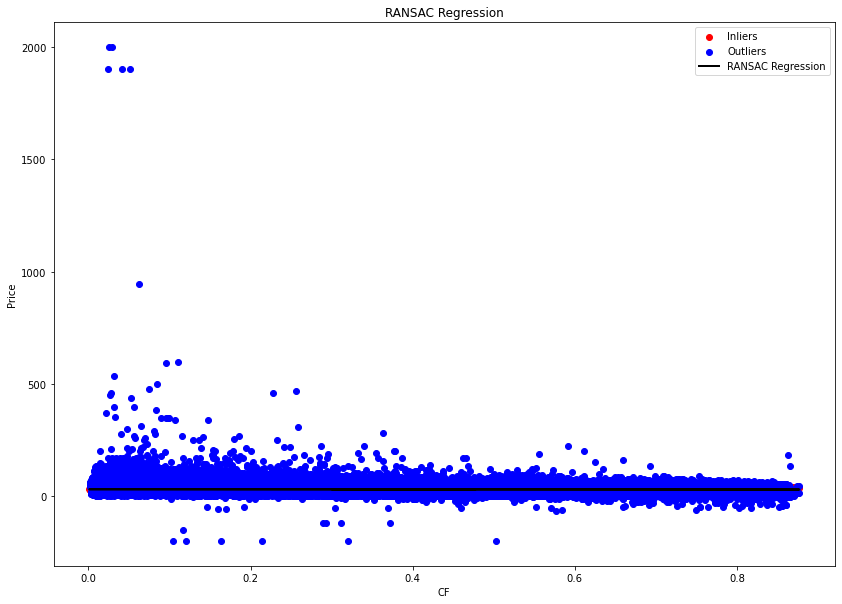

In [74]:
# Robust Regression
# Reshape the CF array if needed
CF = CF.flatten()

# Create RANSACRegressor model
ransac_cf = RANSACRegressor()

# Fit the model to CF data
ransac_cf.fit(CF.reshape(-1, 1), Price)

# Obtain the inliers and outliers from RANSAC regressor
inlier_mask  = ransac_cf.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Plot CF and Price with RANSAC inliers and outliers
plt.figure(figsize=(14, 10))
plt.scatter(CF[inlier_mask], Price[inlier_mask], color='red', label='Inliers')
plt.scatter(CF[outlier_mask], Price[outlier_mask], color='blue', label='Outliers')
plt.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
plt.title('RANSAC Regression')
plt.xlabel('CF')
plt.ylabel('Price')
plt.legend()
plt.show()

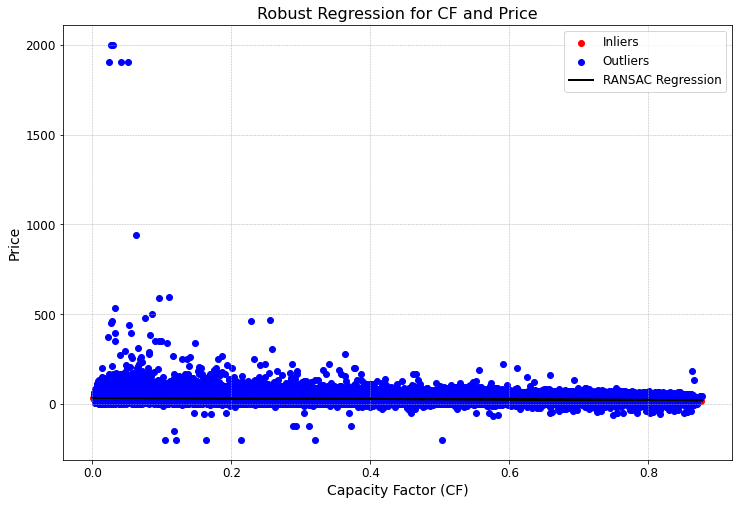

In [75]:
# Reshape the CF array if needed
CF = CF.flatten()

# Create RANSACRegressor model
ransac_cf = RANSACRegressor()

# Fit the model to CF data
ransac_cf.fit(CF.reshape(-1, 1), Price)

# Obtain the inliers and outliers from RANSAC regressor
inlier_mask = ransac_cf.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot inliers and outliers
plt.scatter(CF[inlier_mask], Price[inlier_mask], color='red', label='Inliers')
plt.scatter(CF[outlier_mask], Price[outlier_mask], color='blue', label='Outliers')

# Plot the RANSAC regression line
plt.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')

# Customize the plot
plt.title('Robust Regression for CF and Price', fontsize=16)
plt.xlabel('Capacity Factor (CF)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

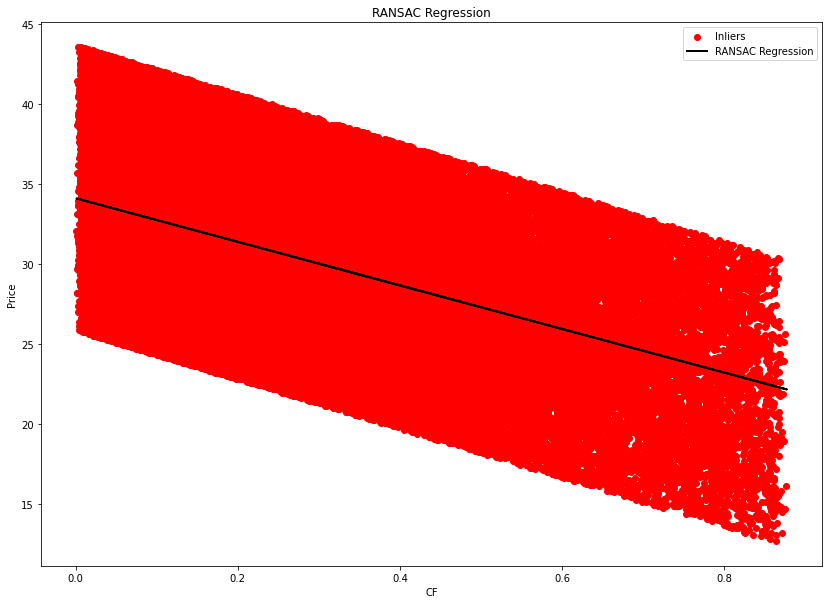

In [76]:
# Robust Regression just inliers
plt.figure(figsize=(14, 10))
plt.scatter(CF[inlier_mask], Price[inlier_mask], color='red', label='Inliers')
plt.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
plt.title('RANSAC Regression')
plt.xlabel('CF')
plt.ylabel('Price')
plt.legend()
plt.show()

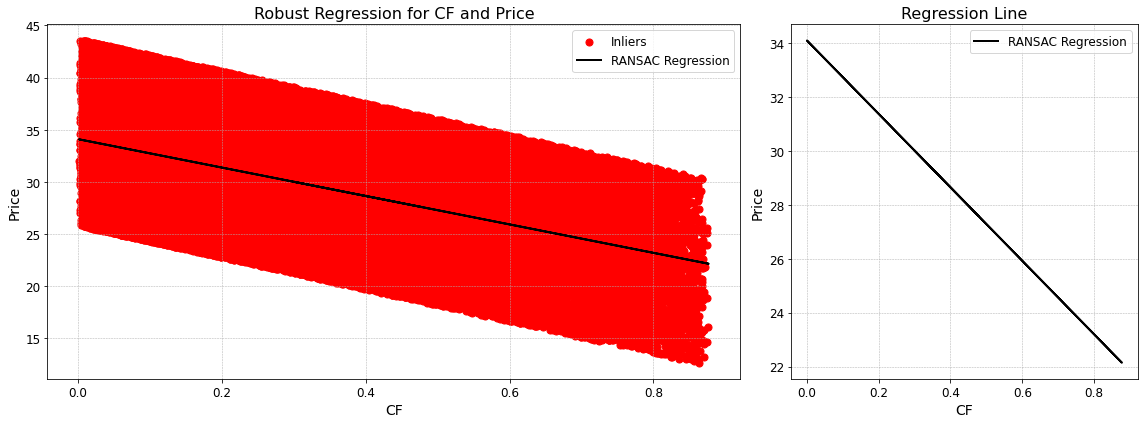

In [77]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Robust Regression just inliers
ax1.scatter(CF[inlier_mask], Price[inlier_mask], color='red', label='Inliers', s=50)
ax1.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
ax1.set_title('Robust Regression for CF and Price', fontsize=16)
ax1.set_xlabel('CF', fontsize=14)
ax1.set_ylabel('Price', fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.tick_params(axis='both', labelsize=12)

# Plot the regression line in the second subplot
ax2.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
ax2.set_title('Regression Line', fontsize=16)
ax2.set_xlabel('CF', fontsize=14)
ax2.set_ylabel('Price', fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.tick_params(axis='both', labelsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

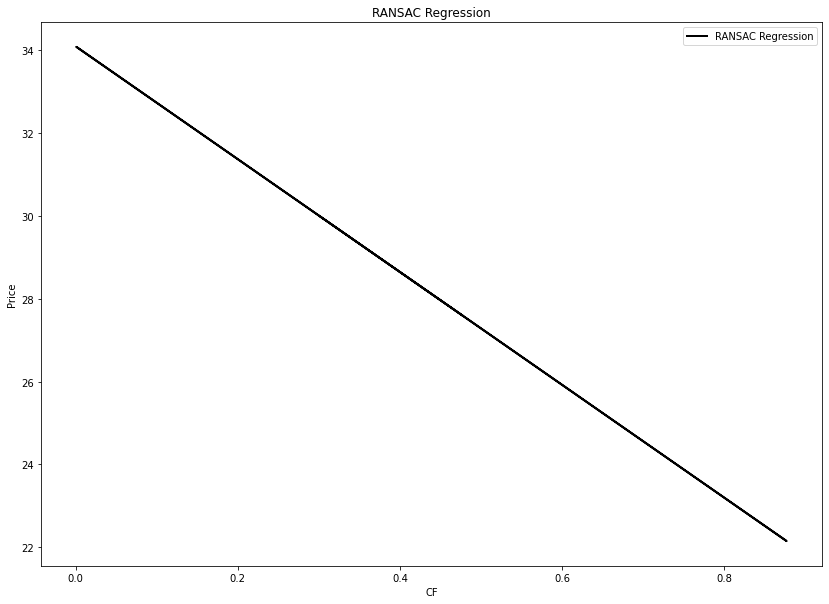

In [78]:
# Plot the RANSAC regression line only
regression_line = ransac_cf.predict(CF.reshape(-1, 1))

plt.figure(figsize=(14, 10))
plt.plot(CF, regression_line, color='black', linewidth=2, label='RANSAC Regression')
plt.title('RANSAC Regression')
plt.xlabel('CF')
plt.ylabel('Price')
plt.legend()
plt.show()

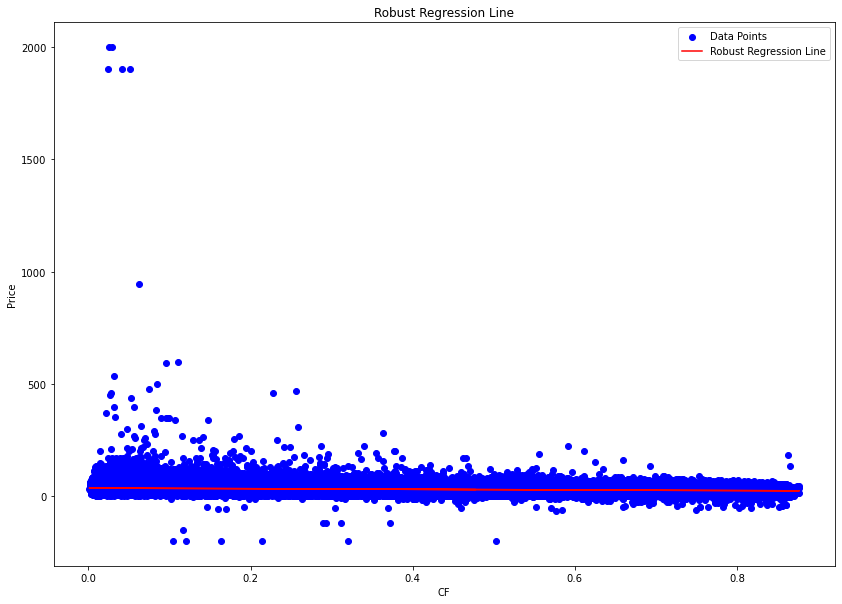

In [79]:
# Robust Regression 2
CF = CF.reshape(-1, 1)

regression_model = HuberRegressor()
regression_model.fit(CF, Price)

slope = regression_model.coef_[0]

plt.figure(figsize=(14, 10))
plt.scatter(CF, Price, color='b', label='Data Points')
plt.plot(CF, regression_model.predict(CF), color='r', label='Robust Regression Line')
plt.xlabel('CF')
plt.ylabel('Price')
plt.legend()
plt.title('Robust Regression Line')
plt.show()

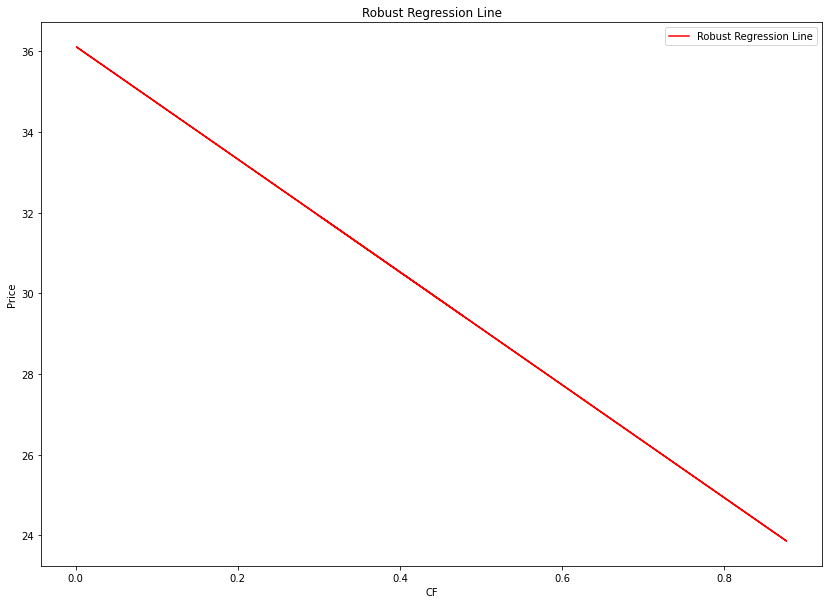

In [80]:
# Plot the robust regression line only 2
regression_line = regression_model.predict(CF)

plt.figure(figsize=(14, 10))
plt.plot(CF, regression_line, color='r', label='Robust Regression Line')
plt.xlabel('CF')
plt.ylabel('Price')
plt.legend()
plt.title('Robust Regression Line')
plt.show()

In [81]:
# Case for load
with open('Consumption.txt', 'r') as f:
    consumption = np.array(f.read().splitlines(), dtype=float)
with open('wind1.txt', 'r') as f:
    wind1       = np.array(f.read().splitlines(), dtype=float)
with open('wind2.txt', 'r') as f:
    wind2       = np.array(f.read().splitlines(), dtype=float)
with open('wind3.txt', 'r') as f:
    wind3       = np.array(f.read().splitlines(), dtype=float)
with open('wind4.txt', 'r') as f:
    wind4       = np.array(f.read().splitlines(), dtype=float)

consumption     = np.flip(consumption)
wind1           = np.flip(wind1)
wind2           = np.flip(wind2)
wind3           = np.flip(wind3)
wind4           = np.flip(wind4)
wind_production = wind1+wind2+wind3+wind4
load            = consumption-wind_production

In [82]:
# new time index and price for new data
start_date1  = '2004-12-31 01:00:00'
end_date1    = '2017-12-31 00:00:00'
time_index_n = pd.date_range(start=start_date1, end=end_date1, freq='H')
Price_new    = Price[-113952:]

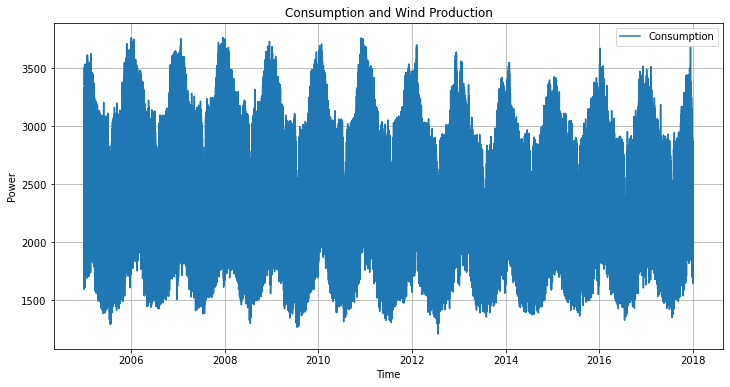

In [83]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(time_index_n, consumption, label='Consumption')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Consumption and Wind Production')
plt.legend()
plt.grid(True)
plt.show()

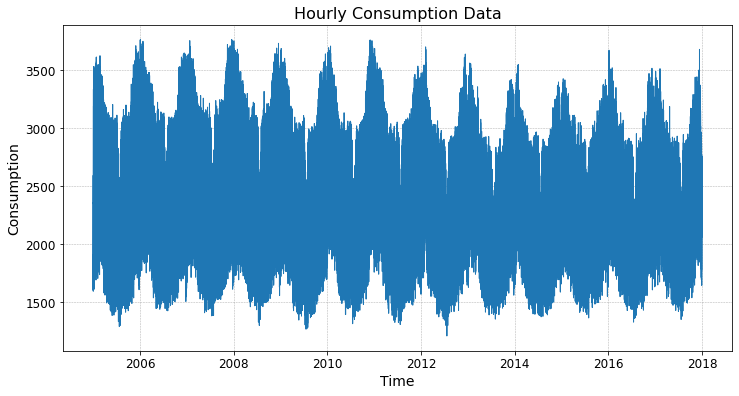

In [84]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot the consumption data
plt.plot(time_index_n, consumption, linewidth=1)

# Customize the plot
plt.xlabel('Time', fontsize=14)
plt.ylabel('Consumption', fontsize=14)
plt.title('Hourly Consumption Data', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

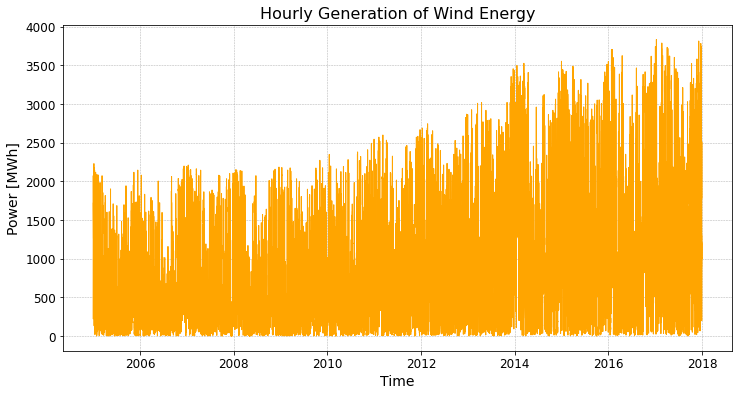

In [85]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot the consumption data
plt.plot(time_index_n, wind_production, color='orange', linewidth=1)

# Customize the plot
plt.xlabel('Time', fontsize=14)
plt.ylabel('Power [MWh]', fontsize=14)
plt.title('Hourly Generation of Wind Energy', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

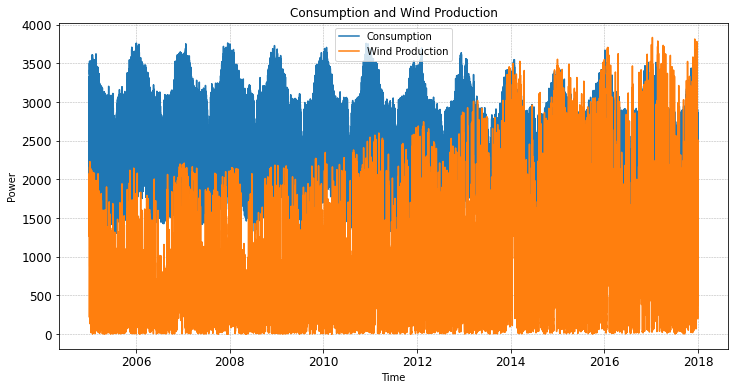

In [86]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(time_index_n, consumption, label='Consumption')
plt.plot(time_index_n, wind_production, label='Wind Production')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Consumption and Wind Production')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

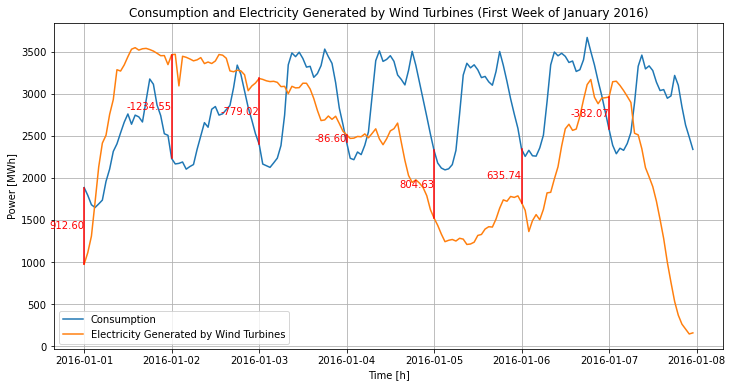

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
with open('Consumption.txt', 'r') as f:
    consumption = np.array(f.read().splitlines(), dtype=float)
with open('wind1.txt', 'r') as f:
    wind1 = np.array(f.read().splitlines(), dtype=float)
with open('wind2.txt', 'r') as f:
    wind2 = np.array(f.read().splitlines(), dtype=float)
with open('wind3.txt', 'r') as f:
    wind3 = np.array(f.read().splitlines(), dtype=float)
with open('wind4.txt', 'r') as f:
    wind4 = np.array(f.read().splitlines(), dtype=float)

# Reverse the arrays
consumption = np.flip(consumption)
wind1 = np.flip(wind1)
wind2 = np.flip(wind2)
wind3 = np.flip(wind3)
wind4 = np.flip(wind4)

# Calculate the total wind production
wind_production = wind1 + wind2 + wind3 + wind4

# Define the time index
start_date2 = '2016-01-01 00:00:00'
end_date2 = '2016-01-07 23:00:00'
time_index_new = pd.date_range(start=start_date2, end=end_date2, freq='H')

# Subset the data for the specified time range
start_index = np.where(time_index_n == pd.to_datetime(start_date2))[0][0]
end_index = np.where(time_index_n == pd.to_datetime(end_date2))[0][0]
consumption = consumption[start_index:end_index+1]
wind_production = wind_production[start_index:end_index+1]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(time_index_new, consumption, label='Consumption')
plt.plot(time_index_new, wind_production, label='Electricity Generated by Wind Turbines')

# Calculate the difference between consumption and wind production for the first hour of each day
consumption_first_hour = consumption[::24]
wind_production_first_hour = wind_production[::24]
difference = consumption_first_hour - wind_production_first_hour

# Add lines to indicate the difference between consumption and wind production
for i in range(len(difference)):
    x = time_index_new[i*24]
    y_cons = consumption_first_hour[i]
    y_wind = wind_production_first_hour[i]
    plt.plot([x, x], [y_cons, y_wind], color='red')
    plt.text(x, (y_cons + y_wind) / 2, f'{difference[i]:.2f}', color='red',
             verticalalignment='center', horizontalalignment='right')

plt.xlabel('Time [h]')
plt.ylabel('Power [MWh]')
plt.title('Consumption and Electricity Generated by Wind Turbines (First Week of January 2016)')
plt.legend()
plt.grid(True)
plt.show()

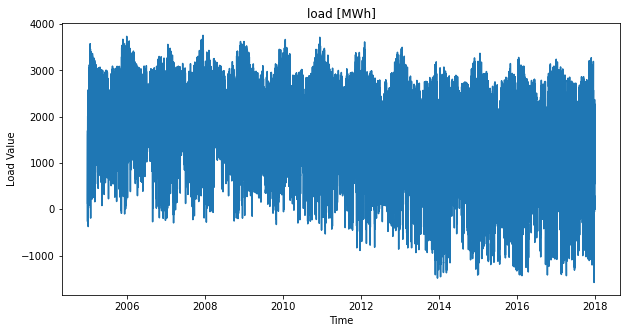

In [88]:
# Plot Load 
plt.figure(figsize=(10, 5))
plt.plot(time_index_n, load)
plt.title('load [MWh]')
plt.xlabel('Time')
plt.ylabel('Load Value')
plt.show()

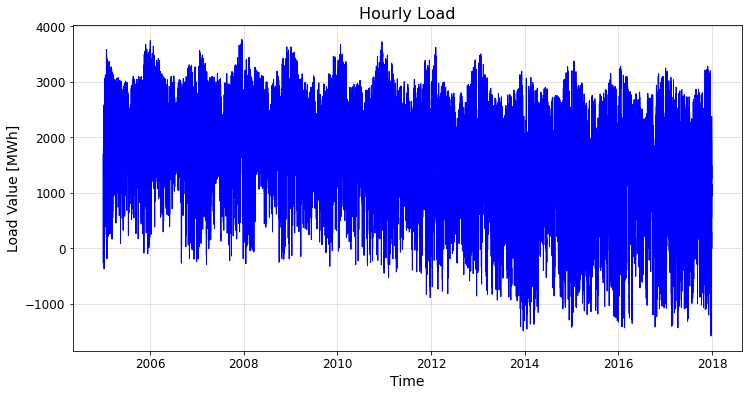

In [89]:
# Plot Load
plt.figure(figsize=(12, 6))
plt.plot(time_index_n, load, color='b', linewidth=1)

# Customize the plot
plt.title('Hourly Load', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Load Value [MWh]', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

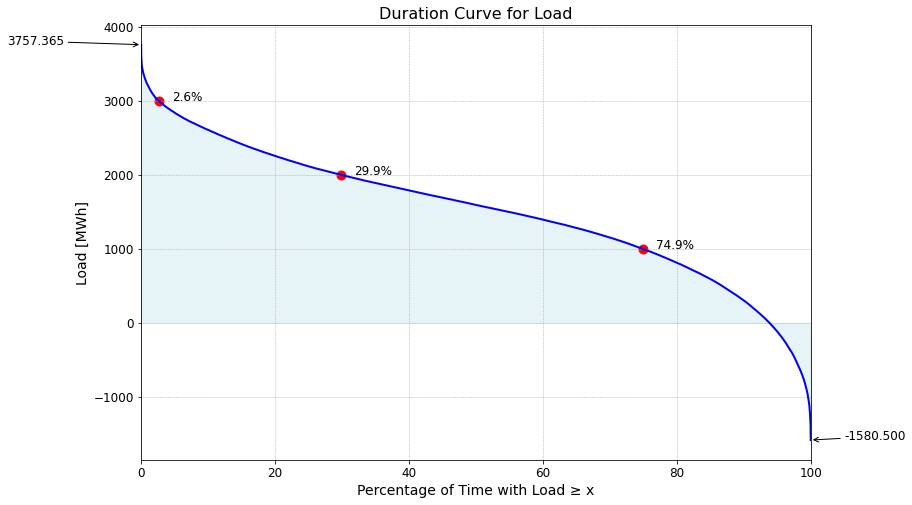

In [90]:
# Duration curve for CF
sorted_load  = sorted(load,reverse=False)
percentage_l = 100 * (1 - np.arange(1, len(sorted_load) + 1) / (len(sorted_load) + 1)) 

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(percentage_l, sorted_load, color='blue', linewidth=2)
plt.title('Duration Curve for Load', fontsize=16)
plt.xlabel('Percentage of Time with Load ≥ x', fontsize=14)
plt.ylabel('Load [MWh]', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the appearance
plt.xlim([0, 100])
plt.fill_between(percentage_l, sorted_load, color='lightblue', alpha=0.3)

# Add dots and annotations
# Add annotations
plt.annotate(f'{sorted_load[0]:.3f}', xy=(percentage_l[0], sorted_load[0]), xytext=(percentage_l[0]+5, sorted_load[0]+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.annotate(f'{sorted_load[-1]:.3f}', xy=(percentage_l[-1], sorted_load[-1]), xytext=(percentage_l[-1]-20, sorted_load[-1]-0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

load_values = [3000, 2000, 1000]
for load in load_values:
    index = next(i for i, val in enumerate(sorted_load) if val >= load)
    plt.scatter(percentage_l[index], sorted_load[index], color='red', s=80)
    plt.annotate(f'{percentage_l[index]:.1f}%', xy=(percentage_l[index], sorted_load[index]), xytext=(percentage_l[index] + 2, sorted_load[index] - 0.1), fontsize=12)

plt.show()

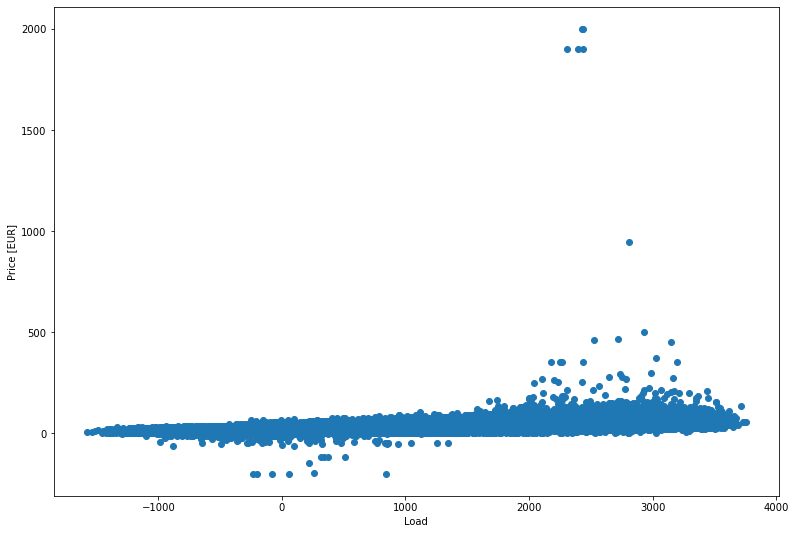

In [91]:
with open('Consumption.txt', 'r') as f:
    consumption = np.array(f.read().splitlines(), dtype=float)
with open('wind1.txt', 'r') as f:
    wind1       = np.array(f.read().splitlines(), dtype=float)
with open('wind2.txt', 'r') as f:
    wind2       = np.array(f.read().splitlines(), dtype=float)
with open('wind3.txt', 'r') as f:
    wind3       = np.array(f.read().splitlines(), dtype=float)
with open('wind4.txt', 'r') as f:
    wind4       = np.array(f.read().splitlines(), dtype=float)

consumption     = np.flip(consumption)
wind1           = np.flip(wind1)
wind2           = np.flip(wind2)
wind3           = np.flip(wind3)
wind4           = np.flip(wind4)
wind_production = wind1+wind2+wind3+wind4
load            = consumption-wind_production

# Plot Load and Price 
plt.figure(figsize=(13, 9))
plt.scatter(load,Price_new)
plt.xlabel('Load')
plt.ylabel('Price [EUR]')
plt.show()

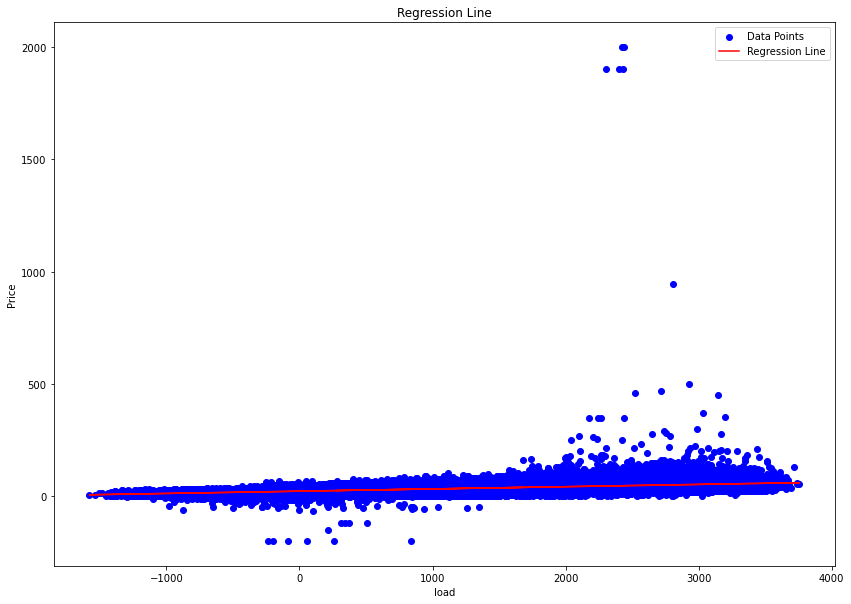

In [92]:
# Simple Regression
load = load.reshape(-1, 1)

regression_model = LinearRegression()
regression_model.fit(load, Price_new)

# Slope
slope = regression_model.coef_[0]

# Plot
plt.figure(figsize=(14, 10))
plt.scatter(load, Price_new, color='b', label='Data Points')
plt.plot(load, regression_model.predict(load), color='r', label='Regression Line')
plt.xlabel('load')
plt.ylabel('Price')
plt.legend()
plt.title('Regression Line')
plt.show()

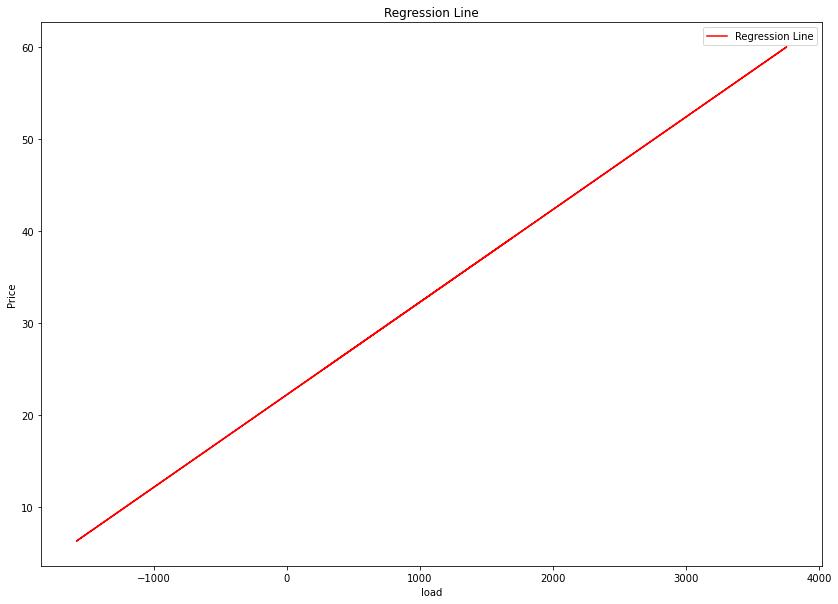

In [93]:
# Plot the regression line
regression_line   = regression_model.predict(load)

plt.figure(figsize=(14, 10))
plt.plot(load, regression_line, color='r', label='Regression Line')
plt.xlabel('load')
plt.ylabel('Price')
plt.legend()
plt.title('Regression Line')
plt.show()

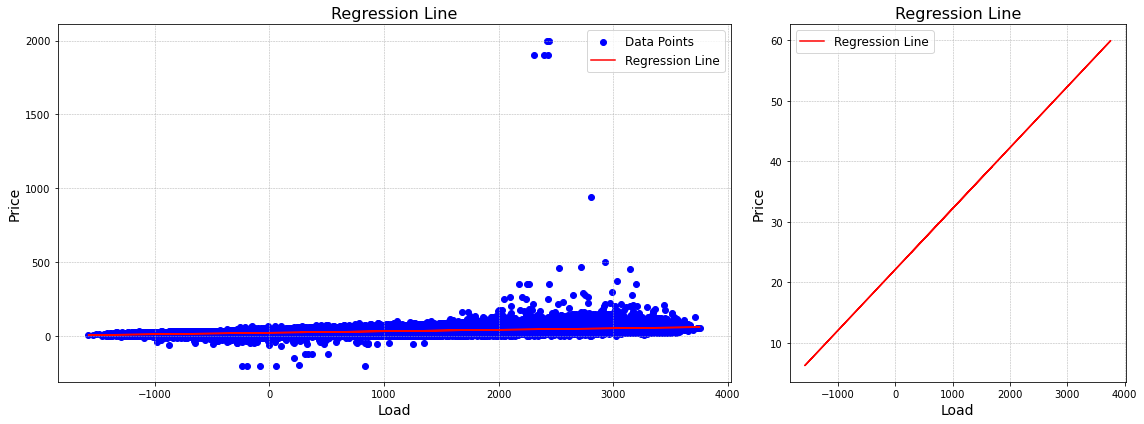

In [94]:
# Simple Regression
load = load.reshape(-1, 1)

# Create a regression model
regression_model = LinearRegression()
regression_model.fit(load, Price_new)

# Generate the regression line points
regression_line = regression_model.predict(load)

# Create a subplot with two plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Left subplot: Data points and regression line
axs[0].scatter(load, Price_new, color='b', label='Data Points')
axs[0].plot(load, regression_line, color='r', label='Regression Line')
axs[0].set_xlabel('Load', fontsize=14)
axs[0].set_ylabel('Price', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].set_title('Regression Line', fontsize=16)
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Right subplot: Regression line only
axs[1].plot(load, regression_line, color='r', label='Regression Line')
axs[1].set_xlabel('Load', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].set_title('Regression Line', fontsize=16)
axs[1].grid(True, linestyle='--', linewidth=0.5)

# Set a tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

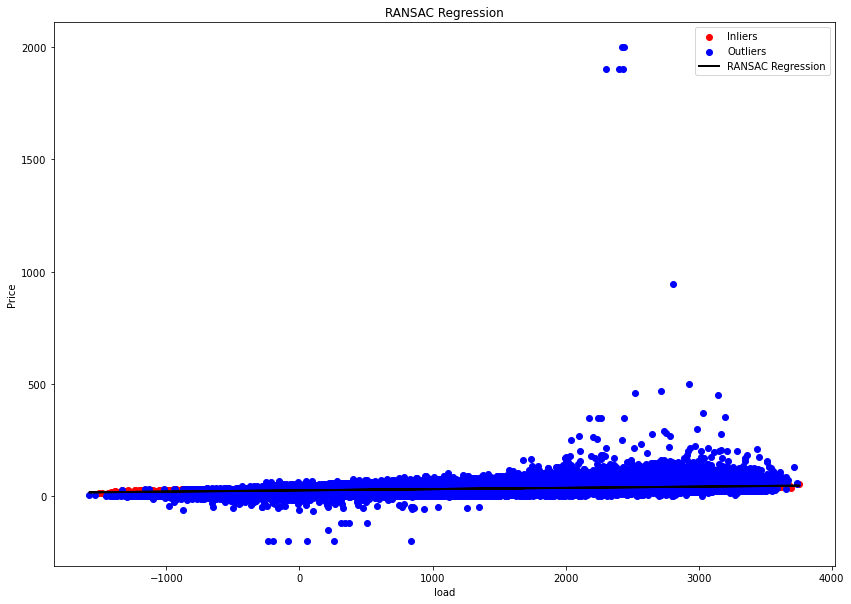

In [95]:
# Robust Regression
load = load.flatten()

# Create RANSACRegressor model
ransac_cf = RANSACRegressor()

# Fit the model to load data
ransac_cf.fit(load.reshape(-1, 1), Price_new)

# Obtain the inliers and outliers from RANSAC regressor
inlier_mask  = ransac_cf.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Plot CF and Price with RANSAC inliers and outliers
plt.figure(figsize=(14, 10))
plt.scatter(load[inlier_mask], Price_new[inlier_mask], color='red', label='Inliers')
plt.scatter(load[outlier_mask], Price_new[outlier_mask], color='blue', label='Outliers')
plt.plot(load, ransac_cf.predict(load.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
plt.title('RANSAC Regression')
plt.xlabel('load')
plt.ylabel('Price')
plt.legend()
plt.show()

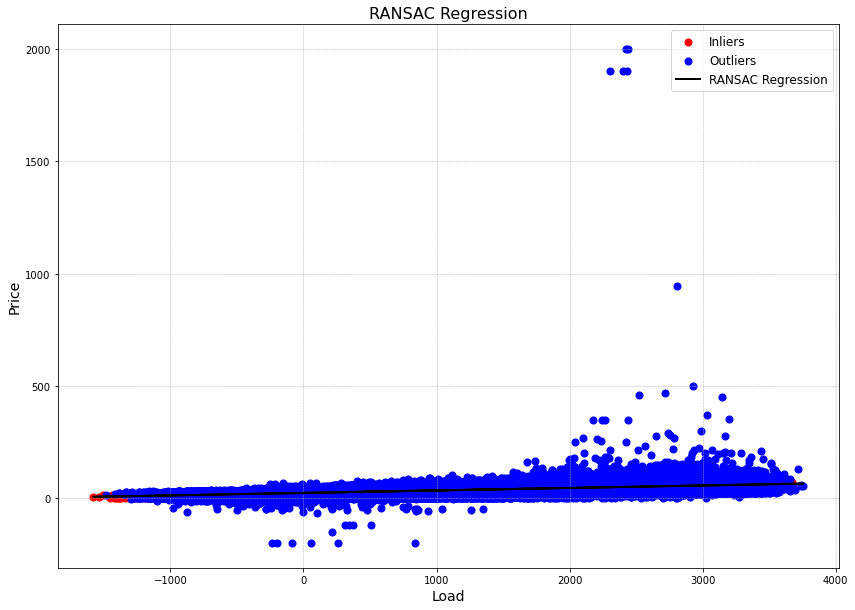

In [96]:
# Robust Regression
load = load.flatten()

# Create RANSACRegressor model
ransac_cf = RANSACRegressor()

# Fit the model to load data
ransac_cf.fit(load.reshape(-1, 1), Price_new)

# Obtain the inliers and outliers from RANSAC regressor
inlier_mask  = ransac_cf.inlier_mask_
outlier_mask = ~inlier_mask

# Create a figure with a larger size
plt.figure(figsize=(14, 10))

# Plot inliers and outliers
plt.scatter(load[inlier_mask], Price_new[inlier_mask], color='red', label='Inliers', s=50)
plt.scatter(load[outlier_mask], Price_new[outlier_mask], color='blue', label='Outliers', s=50)

# Plot the RANSAC regression line
plt.plot(load, ransac_cf.predict(load.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')

# Set labels and title with appropriate font sizes
plt.xlabel('Load', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('RANSAC Regression', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)

# Set legend with appropriate font size
plt.legend(fontsize=12)

# Show the plot
plt.show()

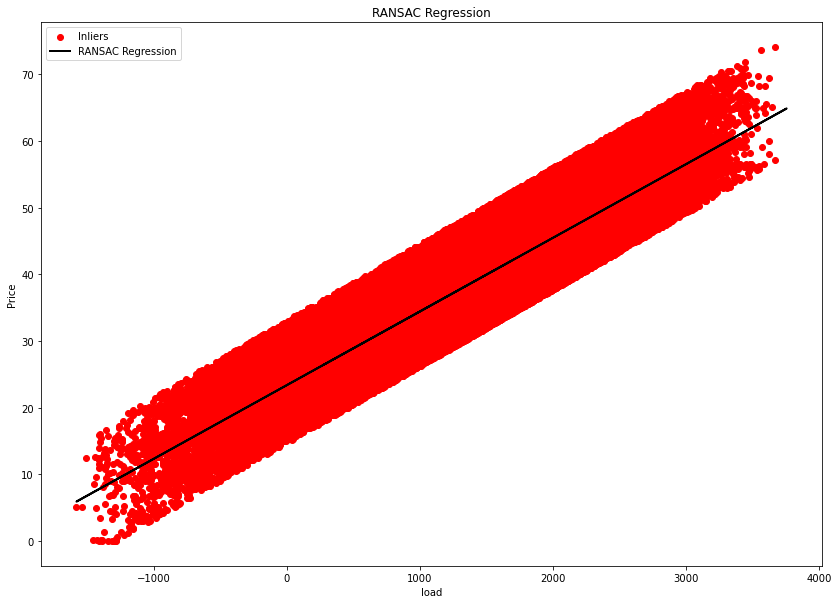

In [97]:
# Robust Regression just with inliers
plt.figure(figsize=(14, 10))
plt.scatter(load[inlier_mask], Price_new[inlier_mask], color='red', label='Inliers')
plt.plot(load, ransac_cf.predict(load.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
plt.title('RANSAC Regression')
plt.xlabel('load')
plt.ylabel('Price')
plt.legend()
plt.show()

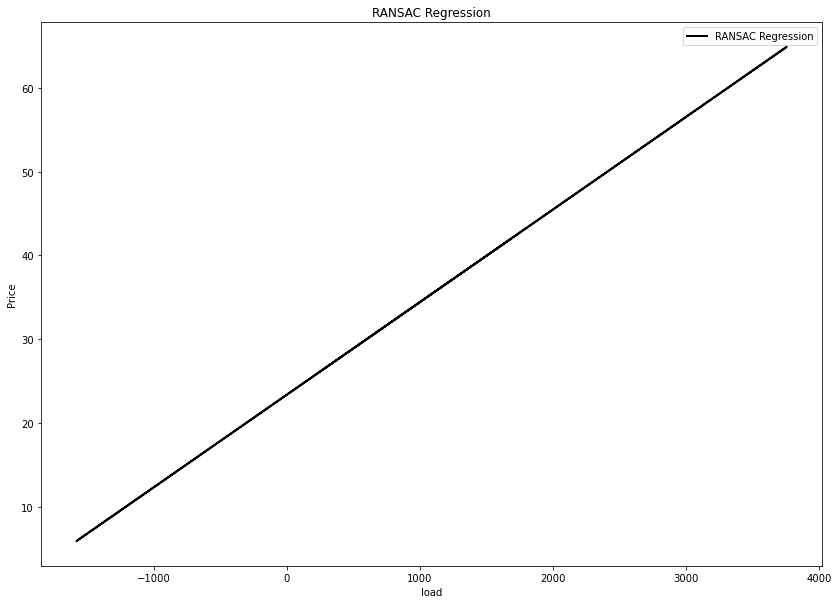

In [98]:
# Plot the RANSAC regression line
regression_line = ransac_cf.predict(load.reshape(-1, 1))

plt.figure(figsize=(14, 10))
plt.plot(load, regression_line, color='black', linewidth=2, label='RANSAC Regression')
plt.title('RANSAC Regression')
plt.xlabel('load')
plt.ylabel('Price')
plt.legend()
plt.show()

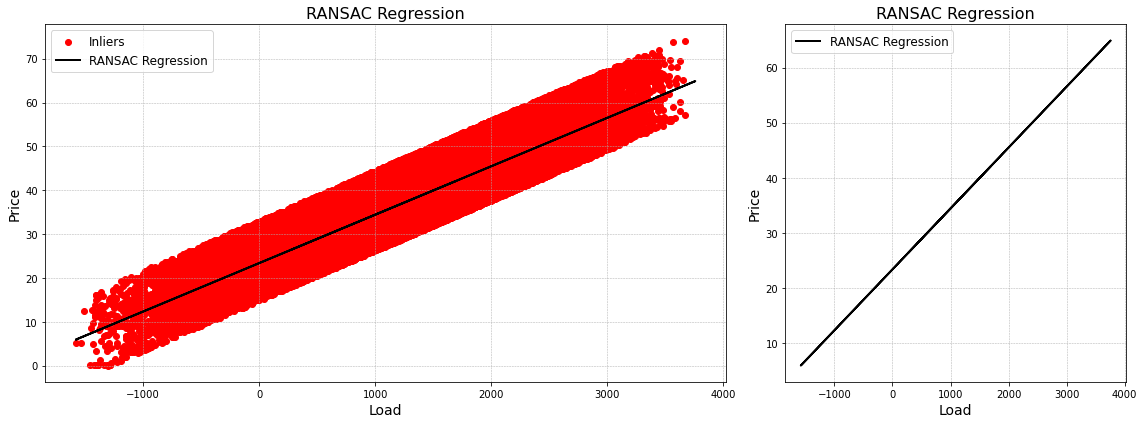

In [99]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

# Create subplots with specified size and width ratios
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Robust Regression just with inliers
axs[0].scatter(load[inlier_mask], Price_new[inlier_mask], color='red', label='Inliers')
axs[0].plot(load, ransac_cf.predict(load.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
axs[0].set_title('RANSAC Regression', fontsize=16)
axs[0].set_xlabel('Load', fontsize=14)
axs[0].set_ylabel('Price', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Plot the RANSAC regression line
regression_line = ransac_cf.predict(load.reshape(-1, 1))

axs[1].plot(load, regression_line, color='black', linewidth=2, label='RANSAC Regression')
axs[1].set_title('RANSAC Regression', fontsize=16)
axs[1].set_xlabel('Load', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()